# Another Phi Identity

Developed from an email from D. B. Koski.

David writes, referring to his stumbling across the Fibonaccis left of zero:


> Not sure if I ever explained how I found this out on my own. The Fibonnaci before zero. It had to do with UVW tetrahedra.

> Setting the U at $2\phi^{0} + 0\phi^{-3}$, the next step up for the V was $3\phi^{0} + 1\phi^{-3}$ and the larger W at $5\phi^{0} + 1\phi^{3}$. This made the prior, lessor phi scaled W at $1\phi^{0} + 1\phi^{-3}$.

>This made no sense since the U at $2\phi^{0} + 0\phi^{-3}$ had coefficients of 2 and 0; F[3] and F[0].
How could the lessor W have coefficients of F[2] and F[?] unless of course the Fibonnaci series had to be going on, "left of zero". The lessor W had coefficients of F[2] and F[-1]

[ $\LaTeX$ added]

Here's one way to express the identity I'm studying:

$$
2\left( n-i+1 \right) = \\
\sum_{i}^{n} \left( F(i)\phi^{3-i} + F(i-3)\phi^{-i} \right)
$$


Where ...F(-3) = 2, F(-2) = -1, F(-1) = 1, F(0) = 0, F(1) = 1, F(2) = 1... F(i) i.e. [the Fibonacci numbers](http://oeis.org/A147316) F(i) where i can be a negative integer.  

Index i ranges up to n inclusive, i.e. i and n set lower and upper bounds for consecutive enumeration.  The two-term expression after the sigma ($\sum$) always yields 2.  The difference between i and n therefore determines what multiple of 2 we have reached.

For example, if i = -5, n = -5

$$F(-5)\phi^{8} +  F(-8)\phi^{5} == $$
$$5\phi^{8} +  -21\phi^{5} == 2 $$

The video, embedded at the end, is incorrect in neglecting to make the 2nd exponent -i instead of i.  The video is part 4 of 4.  I provide links to the other three as well, which take us step by step through the development of this Notebook, starting with an email from David Koski.

David works with phi-scaled volumes, meaning edges will stretch or shrink by the golden mean and volumes will change accordingly, as a plus or minus 3rd power of phi.

What we aim to accomplish, in this exercise, is showing how the above equality might be treated as a claim, the sense of which needs to be established, followed by its truth or untruth.  Instead of looking for a formal proof, we go with extended precision verification, which does not constitute a proof so much as the *sense* of what is claimed.

That sense would come before truth is part of our grammar, in the sameway that what is meaningless cannot be proved or disproved.

Anyway, our equality is far from meaningless and involves two terms always summing to make two, no matter the value of i.  As i travels from its starting value to n, inclusive, it contributes that many 2s, i.e. (n - i + 1) of them.  If i runs from 0 to 1, that's 2 + 2 = 4 and so on.

Winding the Fibonacci Numbers back to start them with 2, -1 reminds us the Fibonacci Numbers [extend in both directions](https://oeis.org/A147316).

In [1]:
import math
import gmpy2

gmpy2.get_context().precision=200

def fibo(a=0, b=1):
    while True:
        yield a
        a, b = b, a + b
        
fib_gen = fibo()
print("SEQ1:",[next(fib_gen) for _ in range(10)])

fib_gen = fibo(2, -1)
print("SEQ2:",[next(fib_gen) for _ in range(10)])

coeff0 = fibo()
coeff1 = fibo(2, -1)
Ø      = (gmpy2.sqrt(5) + 1)/2

template = " 2 == {coeff0:>4} * Ø**({a:>3}) + {coeff1:>4} * Ø**({b:>3}) "
expr     = "{coeff0:>3} * Ø**({a:>3}) + {coeff1:>3} * Ø**({b:>3})"
args     = {}

for i in range(10):
    args["a"] = 3 - i
    args["b"] = -i
    args["coeff0"] = next(coeff0)
    args["coeff1"] = next(coeff1)
    identity = template.format(**args)
    print(identity, end=" --> ")
    print("{:>20.18f}".format(eval(expr.format(**args))))

SEQ1: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
SEQ2: [2, -1, 1, 0, 1, 1, 2, 3, 5, 8]
 2 ==    0 * Ø**(  3) +    2 * Ø**(  0)  --> 2.000000000000000000
 2 ==    1 * Ø**(  2) +   -1 * Ø**( -1)  --> 2.000000000000000000
 2 ==    1 * Ø**(  1) +    1 * Ø**( -2)  --> 2.000000000000000000
 2 ==    2 * Ø**(  0) +    0 * Ø**( -3)  --> 2.000000000000000000
 2 ==    3 * Ø**( -1) +    1 * Ø**( -4)  --> 2.000000000000000000
 2 ==    5 * Ø**( -2) +    1 * Ø**( -5)  --> 2.000000000000000000
 2 ==    8 * Ø**( -3) +    2 * Ø**( -6)  --> 2.000000000000000000
 2 ==   13 * Ø**( -4) +    3 * Ø**( -7)  --> 2.000000000000000000
 2 ==   21 * Ø**( -5) +    5 * Ø**( -8)  --> 2.000000000000000000
 2 ==   34 * Ø**( -6) +    8 * Ø**( -9)  --> 2.000000000000000000


Lets evaluate the individual terms on either side of the + symbol.  They're not both equal to 1 are they?  That would mean we're just writing 1 + 1 == 2 every time.  But we already know either term may be 0, so clearly we can't expect the same terms in each row.

In [8]:
term1    = "{coeff0:>3} * Ø**({a:>3})"
term2    = "{coeff1:>3} * Ø**({b:>3})"
terms    = "{t1:>12.9f} + {t2:>12.9f}"
args     = {}
coeff0 = fibo()
coeff1 = fibo(2, -1)

for i in range(10):
    args["a"] = 3 - i
    args["b"] = -i
    args["coeff0"] = next(coeff0)
    args["coeff1"] = next(coeff1)
    t1 = eval(term1.format(**args))
    t2 = eval(term2.format(**args))
    print(terms.format(t1=t1, t2=t2), end=" --> ")
    print("{:>12.9f}".format(eval(expr.format(**args))))

 0.000000000 +  2.000000000 -->  2.000000000
 2.618033989 + -0.618033989 -->  2.000000000
 1.618033989 +  0.381966011 -->  2.000000000
 2.000000000 +  0.000000000 -->  2.000000000
 1.854101966 +  0.145898034 -->  2.000000000
 1.909830056 +  0.090169944 -->  2.000000000
 1.888543820 +  0.111456180 -->  2.000000000
 1.896674439 +  0.103325561 -->  2.000000000
 1.893568819 +  0.106431181 -->  2.000000000
 1.894755060 +  0.105244940 -->  2.000000000


In [3]:
def sequence(n):
    coeff0 = fibo()
    coeff1 = fibo(2, -1)
    total = 0
    for i in range(n+1):
        args["a"] = 3 - i
        args["b"] = -i
        args["coeff0"] = next(coeff0)
        args["coeff1"] = next(coeff1)
        total += eval(expr.format(**args))
    return total

In [4]:
sequence(0)

mpfr('2.0',200)

In [5]:
[sequence(n) for n in range(10)]

[mpfr('2.0',200),
 mpfr('4.0',200),
 mpfr('6.0',200),
 mpfr('8.0',200),
 mpfr('10.0',200),
 mpfr('12.0',200),
 mpfr('14.0',200),
 mpfr('16.0',200),
 mpfr('18.0',200),
 mpfr('20.0',200)]

Lets generalize by rewinding further back in the Fibonacci Numbers, starting with coefficients 610 and -144 respectively, and going forward from there.  The printout below overlaps the one above, while showing that, indeed, we're free to press this identity in both directions.  

Two terms with Fibonacci coefficients, three apart (the first ahead), and exponents of phi three apart (the first three higher), always add to give the number 2, starting with anchoring relationships such as:

$$
2 = fibo(i)\phi^{3-i} + fibo(i-3)\phi^{-i}
$$

We could rewrite the Sigma expression accordingly.

In [6]:
fib_gen = fibo(-144, 89)
print("SEQ1:",[next(fib_gen) for _ in range(10)])

fib_gen = fibo(610, -377)
print("SEQ2:",[next(fib_gen) for _ in range(10)])

coeff0 = fibo(-144, 89)
coeff1 = fibo(610, -377)
for i in range(-12,8):
    args["a"] = 3 - i
    args["b"] = -i
    args["coeff0"] = next(coeff0)
    args["coeff1"] = next(coeff1)
    identity = template.format(**args)
    print(identity, end=" --> ")
    print("{:>20.18f}".format(eval(expr.format(**args))))

SEQ1: [-144, 89, -55, 34, -21, 13, -8, 5, -3, 2]
SEQ2: [610, -377, 233, -144, 89, -55, 34, -21, 13, -8]
 2 == -144 * Ø**( 15) +  610 * Ø**( 12)  --> 2.000000000000000000
 2 ==   89 * Ø**( 14) + -377 * Ø**( 11)  --> 2.000000000000000000
 2 ==  -55 * Ø**( 13) +  233 * Ø**( 10)  --> 2.000000000000000000
 2 ==   34 * Ø**( 12) + -144 * Ø**(  9)  --> 2.000000000000000000
 2 ==  -21 * Ø**( 11) +   89 * Ø**(  8)  --> 2.000000000000000000
 2 ==   13 * Ø**( 10) +  -55 * Ø**(  7)  --> 2.000000000000000000
 2 ==   -8 * Ø**(  9) +   34 * Ø**(  6)  --> 2.000000000000000000
 2 ==    5 * Ø**(  8) +  -21 * Ø**(  5)  --> 2.000000000000000000
 2 ==   -3 * Ø**(  7) +   13 * Ø**(  4)  --> 2.000000000000000000
 2 ==    2 * Ø**(  6) +   -8 * Ø**(  3)  --> 2.000000000000000000
 2 ==   -1 * Ø**(  5) +    5 * Ø**(  2)  --> 2.000000000000000000
 2 ==    1 * Ø**(  4) +   -3 * Ø**(  1)  --> 2.000000000000000000
 2 ==    0 * Ø**(  3) +    2 * Ø**(  0)  --> 2.000000000000000000
 2 ==    1 * Ø**(  2) +   -1 * Ø**( -1

In [13]:
terms    = "{t1:>18.9f} + {t2:>18.9f}"
coeff0 = fibo(-144, 89)
coeff1 = fibo(610, -377)
for i in range(-12,8):
    args["a"] = 3 - i
    args["b"] = -i
    args["coeff0"] = next(coeff0)
    args["coeff1"] = next(coeff1)
    t1 = eval(term1.format(**args))
    t2 = eval(term2.format(**args))
    print(terms.format(t1=t1, t2=t2), end=" --> ")
    print("{:>12.9f}".format(eval(expr.format(**args))))

 -196416.105571791 +   196418.105571791 -->  2.000000000
   75026.894424525 +   -75024.894424525 -->  2.000000000
  -28655.105565830 +    28657.105565830 -->  2.000000000
   10947.894408919 +   -10945.894408919 -->  2.000000000
   -4179.105524974 +     4181.105524974 -->  2.000000000
    1598.894301956 +    -1596.894301956 -->  2.000000000
    -608.105244940 +      610.105244940 -->  2.000000000
     234.893568819 +     -232.893568819 -->  2.000000000
     -87.103325561 +       89.103325561 -->  2.000000000
      35.888543820 +      -33.888543820 -->  2.000000000
     -11.090169944 +       13.090169944 -->  2.000000000
       6.854101966 +       -4.854101966 -->  2.000000000
       0.000000000 +        2.000000000 -->  2.000000000
       2.618033989 +       -0.618033989 -->  2.000000000
       1.618033989 +        0.381966011 -->  2.000000000
       2.000000000 +        0.000000000 -->  2.000000000
       1.854101966 +        0.145898034 -->  2.000000000
       1.909830056 +        0.0

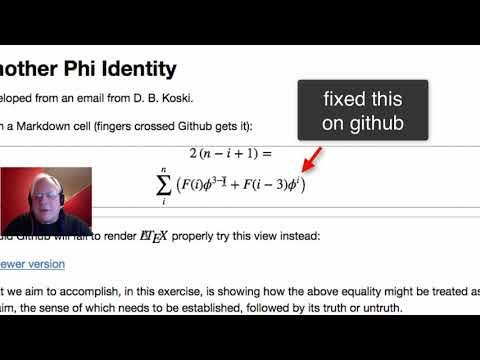

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo("kXn-cvynsoE")

The [nbviewer view](https://nbviewer.jupyter.org/github/4dsolutions/Python5/blob/master/Phi_identity.ipynb) of this Notebook will show the embedded Youtube.  The above is Part 4 of 4.  Here are links to the previous three in first to last order:

* [Part 1: Python Syntax](https://youtu.be/lkGsi9uwMlo)
* [Part 2: Fun with Phi and Fibonaccis](https://youtu.be/3pJ-WhvmRFI)
* [Part 3: More Fun with Phi](https://youtu.be/xlyKfG_5s4E)
* [Part 4: Phi Identity](https://youtu.be/kXn-cvynsoE)